In [266]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import mglearn
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

## Naive Bayes

- 선형모델과 유사(LogisticREgression, LinearSVC, ...)
- 훈련속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
- 종류
    - GaussianNB : 연속적인 데이터
    - BernoulliNB : 이산 데이터
    - MultinomialNB : 이산 데이터
    

### 가우시안 나이브 베이즈


In [2]:
from sklearn.datasets import load_iris
iris = load_iris
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

AttributeError: 'function' object has no attribute 'data'

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
model = GaussianNB().fit(X_train, y_train)

In [7]:
pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, pred))
# 0 :세토사, 1 버시칼라, 2 : 버지니카

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [10]:
# 성능 확인
accuracy_score(y_test, pred)

0.9666666666666667

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]], dtype=int64)

## 다항분포 나이브 베이즈
+ 영화 리뷰를 이용한 평가 예측 (부정/긍정)

In [25]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [26]:
# posiive : 1, negative: 0
# type특성을 숫자로 매핑
df["label"] = df["type"].map({ 'positive' : 1, 'negative': 0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [29]:
# movie_review : X, label : y값으로 하기
df_x = df["movie_review"]
df_y = df["label"]

In [4]:
# 단어 빈도수를 수치화 하기
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
x_traincv
# 10x37 매트릭스가 생성
# 리뷰단어 개수가 37개, 단어 빈도수로 처리
# 어떻게 처리했는지 보기
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [34]:
# 단어 확인
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [35]:
# 37개의 단어
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [3]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
mnb = MultinomialNB().fit(x_traincv, df_y)
# 숫자로 바꾼 것을 넘겨줘야 한다.

In [39]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df["type"].map({ 'positive' : 1, 'negative': 0})

test_x = test_df["movie_review"]
test_y = test_df["label"]

In [40]:
x_testcv = cv.transform(test_x)

In [41]:
pred = mnb.predict(x_testcv)

In [43]:
# 정확도
accuracy_score(test_y, pred)

1.0

## 베르누이 나이브 베이즈

In [2]:
from sklearn.naive_bayes import BernoulliNB

In [61]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]


df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [54]:
df['label'] = df['spam'].map({True:1, False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [55]:
# x, y로 나눠서 저장
X = df["email title"]
y = df["label"]

In [68]:
# 단어 빈도수 저장
cv = CountVectorizer()
x_traincv = cv.fit_transform(X)
encoded_in = x_traincv.toarray()
encoded_in

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [69]:

cv.inverse_transform(encoded_in)
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [76]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df["spam"].map({ True : 1, False: 0})

test_x = test_df["email title"]
test_y = test_df["label"]

In [77]:
# 학습 시키기
nnn = BernoulliNB().fit(x_traincv, y)

In [78]:
x_testcv = cv.transform(test_x)
pred = nnn.predict(x_testcv)
accuracy_score(test_y, pred)

0.8333333333333334

---
# K_MEANS

### 비지도학습




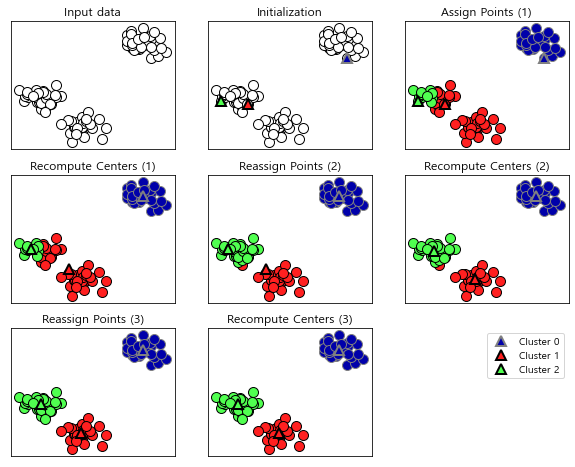

In [5]:
mglearn.plots.plot_kmeans_algorithm()

#### make_blobs() : 샘플 활용

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [21]:
# 어떤 데이터인지 산포도로 확인
X, y = make_blobs()    

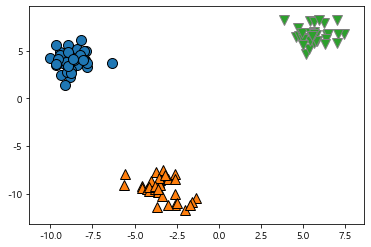

In [22]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [23]:
# K-means에서 가장 먼저 할 것은 클러스터 개수 지정
# 비지도학습이기에 정답 데이터 y를 주지 않고 학습
km = KMeans(n_clusters=3).fit(X)


In [24]:
lbl = km.labels_
#  첫번째 집단 : 0, 두번째 : 1, 세번째 : 2
# 레이블의 번호는 달라질 수 있다. 

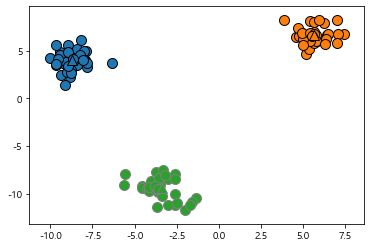

In [27]:
# 모양을 o 로 센터표시
mglearn.discrete_scatter(X[:,0], X[:,1], lbl, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0],
                         km.cluster_centers_[:, 1],[0, 1, 2], markers="^")

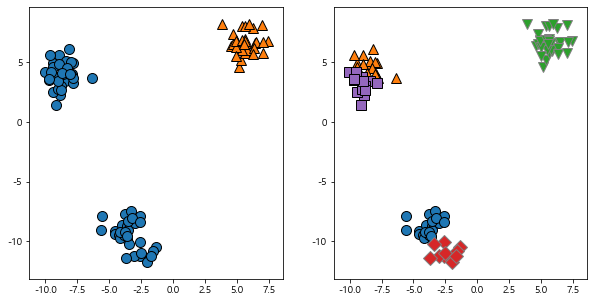

In [28]:
# 분류집단을 5개로 

fig, axes = plt.subplots(1,2, figsize=(10, 5))

idx = 0
for k in [2, 5]:
    km =KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:,0], X[:,1], lbl, ax=axes[idx])
    idx += 1
# ax=axes[idx] 어느 그래프에 그릴지 0번째, 1번째

#### make_moons 샘플 활용


In [29]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

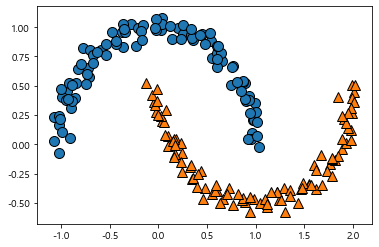

In [30]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [31]:
km = KMeans(n_clusters=2).fit(X)

In [32]:
# lbl = km.labels_
pred = km.predict(X) # 같은 방법

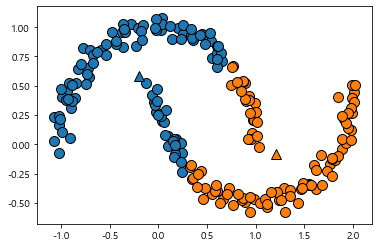

In [34]:
mglearn.discrete_scatter(X[:,0], X[:,1], pred, markers="o")
# 원하는대로 분류가 되지 않음, 
# 중심점
mglearn.discrete_scatter(km.cluster_centers_[:, 0],
                         km.cluster_centers_[:, 1],[0, 1], markers="^")

# 뚜렷한 형태, 단순한 형태의 데이터에서 활용해야 한다.

#### iris 샘플 활용

In [74]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width",
                                    "petal_length", "petal_width"])

y = pd.DataFrame(iris.target, columns=["target"])
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, '꽃잎')

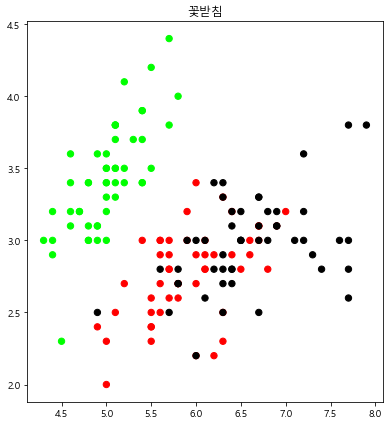

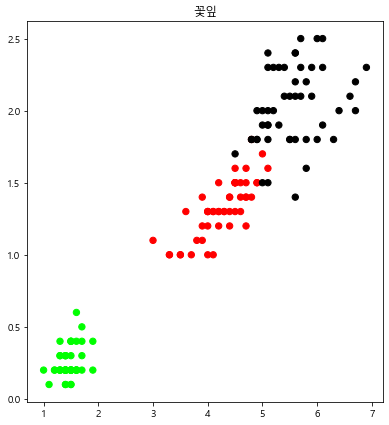

In [75]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1,2,1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [91]:
km = KMeans(n_clusters=3).fit(X)

In [92]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '예측값')

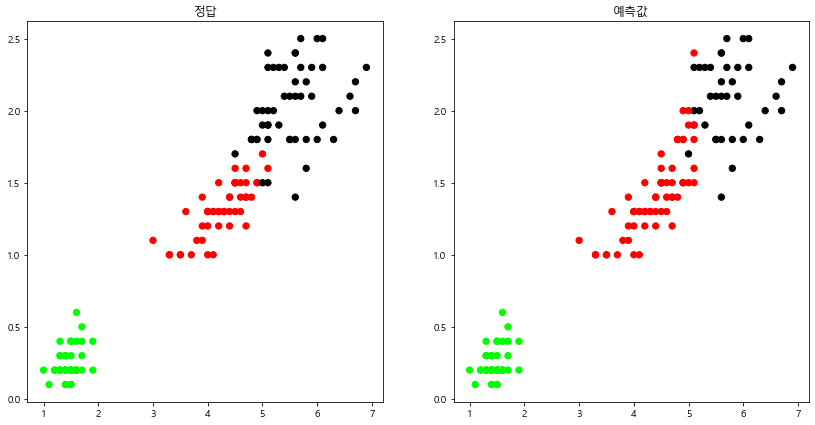

In [93]:
# 꽃잎으로 정답과 예측값 보기
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1,2,1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[km.labels_], s=40)
plt.title("예측값")

In [94]:
# 정답률
# 순서가 다라지면서 정답률 또한 달리 나올 수가 았다.
# iris 데이터는 지도학습 데이터이기에 비지도학습에는 맞지는 않다.
accuracy_score(y, km.labels_)

0.8933333333333333

In [96]:
#  오차 확인
from sklearn.metrics import confusion_matrix

confusion_matrix(y, km.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

####  사람의 키와 몸무게 데이터 활용

In [109]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 73]
df.loc[2] = [180, 56]
df.loc[3] = [178, 89]
df.loc[4] = [189, 93]
df.loc[5] = [170, 60]
df.loc[6] = [176, 56]
df.loc[7] = [178, 80]
df.loc[8] = [169, 69]
df.loc[9] = [182, 67]

In [110]:
df

,height,weight
0,185,60
1,180,73
2,180,56
3,178,89
4,189,93
5,170,60
6,176,56
7,178,80
8,169,69
9,182,67


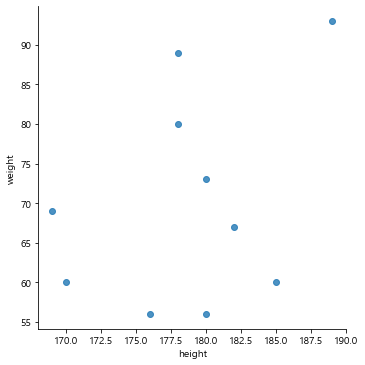

In [112]:
sns.lmplot("height", "weight", data=df, fit_reg=False)

In [121]:
km = KMeans(n_clusters=3).fit(df.values)

In [122]:
df["label"] = km.labels_
df

,height,weight,label
0,185,60,1
1,180,73,2
2,180,56,1
3,178,89,0
4,189,93,0
5,170,60,1
6,176,56,1
7,178,80,2
8,169,69,2
9,182,67,2


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


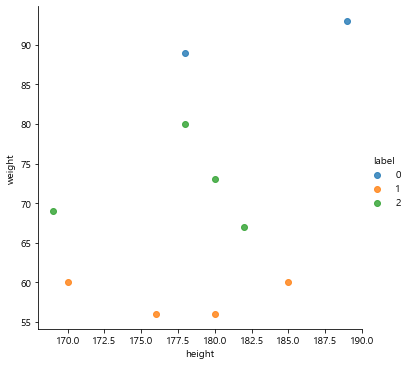

In [123]:
# 색깔별로 구분하여 그래프 그리기
sns.lmplot("height", "weight", data=df, fit_reg=False, hue="label")

# 타이타닉을 이용한 알고리즘 성능 비교
#### 1. prepare Data
    - https://www.kaggle.com/search?q=titanic

In [168]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 2. EDA(탐색적 데이터 분석)


In [169]:
print(test.shape)
print(train.shape)
print(train.info()) # 결측치도 확인
print(test.info())

(418, 11)
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [170]:
"""
-Pclass
- Sex
- SibSp
- Embarked
    C : Cherbourg
    Q : Queenstown
    S : Southhampton
- Cabin
"""

'\n-Pclass\n- Sex\n- SibSp\n- Embarked\n    C : Cherbourg\n    Q : Queenstown\n    S : Southhampton\n- Cabin\n'

In [171]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()# 산 사람에 대한 빈도수
    dead = train[train["Survived"]==0][feature].value_counts()# 죽은 사람에 대한 빈도수
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind = "bar", stacked=True, figsize=(10,5))

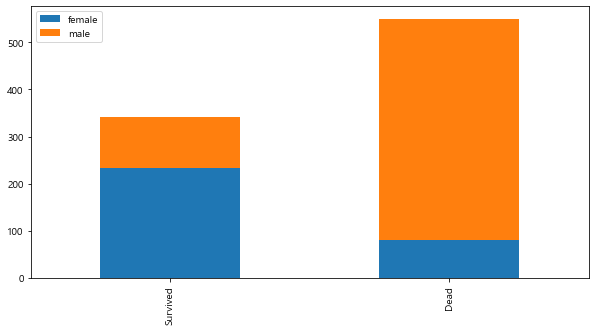

In [172]:
bar_chart("Sex")

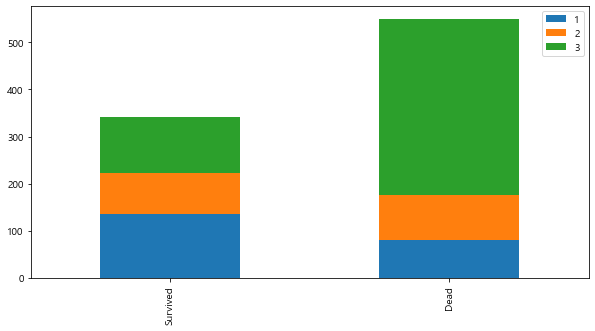

In [173]:
# 객실 등급에 따른 생사
# 객실 등급이 생사에 영향을 줬다고 해석할 수 있다.
bar_chart("Pclass")

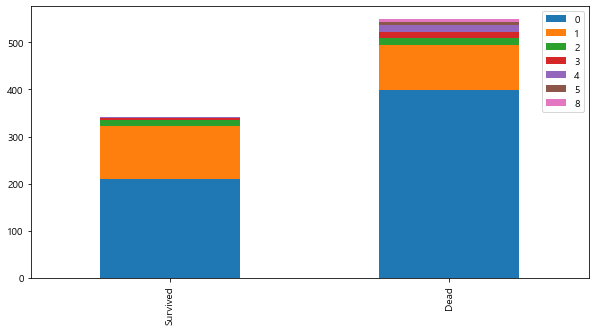

In [174]:
# 동승자
bar_chart("SibSp")

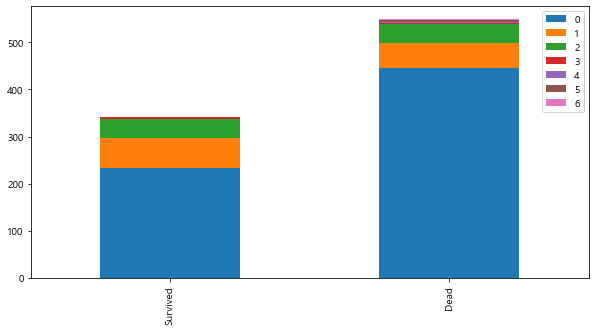

In [175]:
bar_chart("Parch") # 부모자식 관계 탑승자


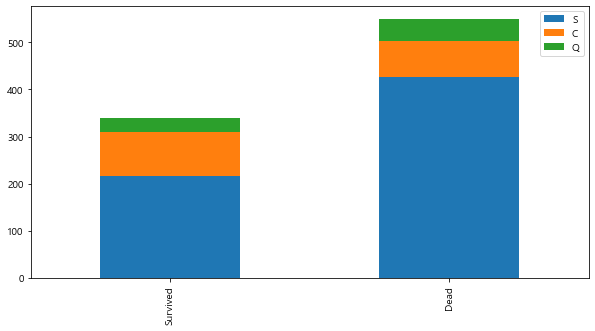

In [176]:
# 출신지 별 생사
bar_chart("Embarked")

#### 3. Feature Engineering (전처리)


In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1) Name 컬럼을 이용하여 호칭(Mr, Mrs, Miss)을 추출


In [104]:
# 훈련데이터와 테스트 데이터에도 적용

In [178]:
train_test_data = [train, test]
# 규칙이 없어 정규 표현식을 사용
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\. ")

In [179]:
print(train["Title"].value_counts()) # Title 중 Mr, Miss, Mrs만 사용

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Don           1
Lady          1
Countess      1
Ms            1
Capt          1
Mme           1
Jonkheer      1
Name: Title, dtype: int64


In [180]:
# 테스트 데이터에도 적용되었는지 확인
print(test["Title"].value_counts()) 

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


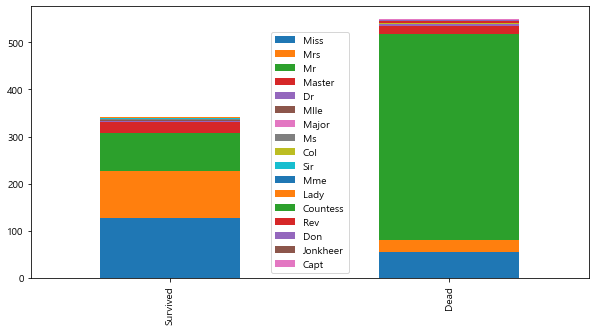

In [108]:
bar_chart("Title")

In [181]:
title_mapping  = {"Mr":0, "Miss":1, "Mrs":2,"Dr":3, "Rev":3, "Dona":3,
                  "Master":40, "Major":3, "Col":3, "Mlle":3,
                    "Countess":3,  "Jonkheer":3, "Mme":3, "Sir":3, "Don":3, "Lady":3,
                   "Ms":3, "MCaptajor":3, "Capt":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)


In [182]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [183]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [185]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [186]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [187]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### 2) Sex 데이터의 인코딩

In [188]:
# test, train data의 성별을 mapping을 통해 숫자로 0과 1로 표시

for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})


In [189]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [190]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


#### 3) Age 데이터의  Bining

+ child:0,        young:1,   adult:2,   mid_age:3,  senior:4
+ child 16세이하, 16 ~ 26세, 26 ~ 36세, 36 ~ 62,    62세이상

In [191]:
# 결측치 확인
print(train.isnull().sum())
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [192]:
# 결측치 처리 : 평균나이로 대체
# 남성은 Mr의 평균나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이로 대체

# groupby로 
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [193]:
train.isnull().sum()
# test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [194]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[(dataset["Age"]>=62), "Age"] = 4

In [195]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


#### 4) Embarked데이터의 결측치 

In [196]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [197]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [198]:
# 결측치 값을 가장 많은 사우스햄튼으로 만들기
train["Embarked"].fillna("S", inplace=True)

In [199]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [200]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [201]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### 5) Fare 데이터의결측치 처리, Binning

+ 17$ : 0, 18 ~ 30$ : 1, 31 ~ 100$ : 2, 100$ ~ : 3

In [202]:
test.isnull().sum()
# Fare의 격측치 하나 확인

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [203]:
# Fare결측치 그 등급의 평균값으로 채우기
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)


In [204]:
test["Fare"].isnull().sum()  # 처리된 것을 확인

0

In [205]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"]=0
    dataset.loc[(dataset["Fare"]>17)& (dataset["Fare"]<=31), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>31)& (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[(dataset["Fare"]>100), "Fare"] = 3

In [206]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [207]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,4.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


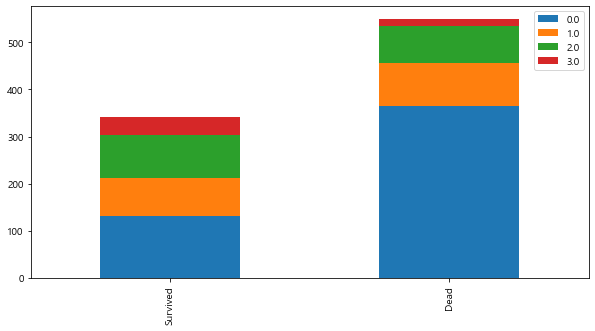

In [208]:
bar_chart("Fare")

#### 6. cabin 데이터 처리

In [209]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
B79            1
C91            1
D11            1
A20            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [210]:
# 알파벳 한글자씩 뽑아보기
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1] # 알파벳 한글자로 뽑기

In [211]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


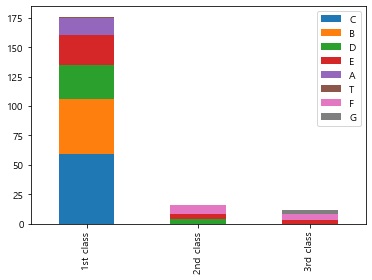

In [212]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()
# train에 Pclass값이 [숫자]이면 Cabin의 알파벳에 따른 갯수

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind="bar", stacked=True)

In [213]:
# 맴핑 시키기

cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4,
                 "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [214]:
train["Cabin"].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [215]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [216]:
# Cabin 결측치 

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


In [217]:
train["Cabin"].isnull().sum()
test["Cabin"].isnull().sum()

0

#### 7.  동승자 컬럼 합치기

In [218]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1 
# 마지막 + 1을 해준 이유는 혼자탄 사람이 0으로 표시되지 않게하기 위해서

In [219]:
train["FamilySize"].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64>

In [220]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


#### 8. 필요없는 컬럼 삭제

In [221]:
feature_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(feature_drop, axis = 1)
test = test.drop(feature_drop, axis = 1)

In [222]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,2
1,2,1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,3,1,2.0,0.0,2.0,0,1,1
3,4,1,1,1,2.0,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0.0,2.0,0,0,1


In [223]:
train = train.drop(["PassengerId"], axis=1) # PassengerId 삭제

In [224]:
X = train.drop("Survived", axis=1) # Survived 빼고 나머지를 X 변수에 저장
y = train["Survived"]

In [225]:
print(X.shape, y.shape)

(891, 8) (891,)


In [226]:
# 체크 포인트

X.to_csv("../Acorn machine learning/titanic/train_data.csv", index=False)

y.to_csv("../Acorn machine learning/titanic/target.csv", index=False)

In [254]:
test.to_csv("../Acorn machine learning/titanic/test_data.csv", index=False)

### 3. Modeling
+ KNN
+ Decision Tree
+ Random Forest
+ SVM
+ Naive Bayes

In [269]:
# 어떤 알고리즘을 사용할지 생각

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB # 숫자값이기에 가우시안 나이브가 적절

# 정확하게 하기 위해
from sklearn.model_selection import KFold # 데이터를 몇번 접어서 학습
from sklearn.model_selection import cross_val_score

In [270]:
# 저장파일 불러오기
X = pd.read_csv("../Acorn machine learning/titanic/train_data.csv")
y = pd.read_csv("../Acorn machine learning/titanic/target.csv")

In [271]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,2.0,0.0,2.0,0,1,1
3,1,1,2.0,2.0,0.8,0,2,2
4,3,0,2.0,0.0,2.0,0,0,1


In [272]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [232]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# n_splits= : 몇 등분 할지. shuffle= : 섞기

---
+ KNN

In [243]:
knnclf = KNeighborsClassifier(n_neighbors=20)
score = cross_val_score(knnclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 
# cross_val_score이 fit 학습시킴
# np.ravel(y) : y값을 2차원에서 1차원으로 바꿔서 주기

In [244]:
print(score)
round(np.mean(score)*100, 2)

[0.81111111 0.78651685 0.80898876 0.80898876 0.86516854 0.84269663
 0.79775281 0.7752809  0.82022472 0.82022472]


81.37

---
+ Decision Tree

In [245]:
declf = DecisionTreeClassifier()
score = cross_val_score(declf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100, 2)

[0.78888889 0.87640449 0.78651685 0.78651685 0.86516854 0.80898876
 0.82022472 0.80898876 0.74157303 0.80898876]


80.92

---
+ Random Forest

In [273]:
rfclf = RandomForestClassifier(n_estimators=300)
score = cross_val_score(rfclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100, 2)

[0.78888889 0.84269663 0.80898876 0.80898876 0.8988764  0.82022472
 0.84269663 0.79775281 0.7752809  0.83146067]


82.16

In [275]:
# 연습
from sklearn.model_selection import GridSearchCV

#params = { 'n_estimators' : [10, 100, 300, 400],
#           'max_depth' : [4, 6, 8, 10, 12 ],
#           'min_samples_leaf' : [4, 8, 12, 18],
#           'min_samples_split' : [8, 16, 20, 24]
#            }

params = {
    'n_estimators':[100,200, 300],
    'max_depth':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[3, 4, 8, 9,10]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs=-1, )
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X, np.ravel(y))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
최고 예측 정확도: 0.8361


In [289]:
rf_clf = RandomForestClassifier(random_state = 0, n_jobs=-1, max_depth=4, min_samples_leaf=1, min_samples_split=10,
                               n_estimators=100)
score = cross_val_score(rfclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 
print(score)
round(np.mean(score)*100, 2)

[0.81111111 0.86516854 0.80898876 0.80898876 0.8988764  0.82022472
 0.83146067 0.80898876 0.7752809  0.83146067]


82.61

---
+ Naive Bayes

In [249]:
nbclf = GaussianNB()
score = cross_val_score(nbclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100, 2)

[0.82222222 0.76404494 0.74157303 0.75280899 0.74157303 0.80898876
 0.69662921 0.75280899 0.80898876 0.79775281]


76.87

---
+ SVM

In [250]:
svclf = SVC()
score = cross_val_score(svclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100, 2)
# svm은 전처리에 신경을 더 써야 한다.

[0.81111111 0.76404494 0.83146067 0.79775281 0.78651685 0.79775281
 0.83146067 0.80898876 0.84269663 0.85393258]


81.26

In [ ]:
# 묶어서 앙상블로 처리해도 된다.

### 4. Testing

In [276]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [277]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [256]:
clf = SVC()
clf.fit(X, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [257]:
# 승객 아이디를 빼고 
test_data = test.drop("PassengerId", axis=1) # copy()를 사용해 변수에 저장해도 된다.

In [258]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,1
1,3,1,3.0,0.0,2.0,0,2,2
2,2,0,4.0,0.0,2.0,2,0,1
3,3,0,2.0,0.0,2.0,0,0,1
4,3,1,1.0,0.0,2.0,0,2,3


In [260]:
pred = clf.predict(test_data)

In [261]:
# 형식에 맞게 꾸미기

submission = pd.DataFrame({"PassengerId":test["PassengerId"], 
                          "Survived":pred})

In [262]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [264]:
# 저장

submission.to_csv("../Acorn machine learning/titanic/submission.csv", index=False)